In [112]:
import numpy as np
import matplotlib.pyplot as plt

class ODE (object):
    def __init__(self,dt=0.001,t0=0.0,tf=10.0,y0=0.0,A=1.0,B=0.0):
        self.dt=dt
        self.t=t0
        self.tf=tf
        self.y=y0
        self.A=A
        self.B=B
        npoints=int(tf/dt)
        self.npoints=npoints
        self.tarray=np.linspace(0.0,tf,int(npoints/200))
    def g(self,y,t):
        num=self.A-self.y*self.B
        return num
    def RK4_step(self):
        a=self.y;b=self.t
        k1 = self.dt*self.g(a,b);
        k2 = self.dt*self.g((a+k1/2),(b+self.dt/2));
        k3 = self.dt*self.g((a+k2/2),(b+self.dt/2));
        k4 = self.dt*self.g((a+k3),(b+self.dt));
        self.y+=1/6*(k1+2*k2+2*k3+k4);
        self.t+=self.dt
    def traj(self):
        y_array=[]
        t_array=[]
        for j in range(self.npoints):
            y_array.append(self.y)
            t_array.append(self.t)
            self.RK4_step()
        self.y_array=np.array(y_array)
        self.t_array=np.array(t_array)
    def plot(self):
        fig1 = plt.figure(figsize = [8,4])
        ax1 = fig1.add_subplot(111)
        ax1.plot(self.t_array, self.y_array, "k", label = 'RK4')
        ax1.set_title('Output')
        ax1.set_xlabel("t")
        ax1.set_ylabel("y")
        ax1.legend(loc=4)
    def results(self):
        print('At Final Time:')
        print('RK4:')
        print('t = {0:0.2f} s | y = {1:0.3f} m'.format(self.t, self.y))
        
class Problem1RC001 (ODE):
    def __init__(self,dt=0.001,t0=0.0,tf=10.0,y0=0.0,A=1.0,B=0.01):
        print("\nProblem NO.1 RC=0.01 is solved here:")
        super().__init__(dt,t0,tf,y0,A,B)
    def g(self,y,t):
        if np.sin(2*np.pi*self.t)>=0:
            self.A=1;
        else:
            self.A=-1;
        num=(self.A-self.y)/self.B
        return num
    def plot(self):
        fig1 = plt.figure(figsize = [8,4])
        ax1 = fig1.add_subplot(111)
        ax1.plot(self.t_array, self.y_array, "k", label = 'RK4-RC=0.01')
        ax1.grid(ls='--')
        ax1.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
        ax1.set_title('V_out for Problem1.1')
        ax1.set_xlabel("t")
        ax1.set_ylabel("V_out")
        ax1.legend(loc=4)

class Problem1RC01 (ODE):
    def __init__(self,dt=0.001,t0=0.0,tf=10.0,y0=0.0,A=1.0,B=0.1):
        print("\nProblem NO.1 RC=0.01 is solved here:")
        super().__init__(dt,t0,tf,y0,A,B)
    def g(self,y,t):
        if np.sin(2*np.pi*self.t)>=0:
            self.A=1;
        else:
            self.A=-1;
        num=(self.A-self.y)/self.B
        return num
    def plot(self):
        fig1 = plt.figure(figsize = [8,4])
        ax1 = fig1.add_subplot(111)
        ax1.plot(self.t_array, self.y_array, "k", label = 'RK4-EC=0.1')
        ax1.grid(ls='--')
        ax1.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
        ax1.set_title('V_out for Problem1.2')
        ax1.set_xlabel("t")
        ax1.set_ylabel("V_out")
        ax1.legend(loc=4)

class Problem1RC1 (ODE):
    def __init__(self,dt=0.001,t0=0.0,tf=10.0,y0=0.0,A=1.0,B=1):
        print("\nProblem NO.1 RC=0.01 is solved here:")
        super().__init__(dt,t0,tf,y0,A,B)
    def g(self,y,t):
        if np.sin(2*np.pi*self.t)>=0:
            self.A=1;
        else:
            self.A=-1;
        num=(self.A-self.y)/self.B
        return num
    def plot(self):
        fig1 = plt.figure(figsize = [8,4])
        ax1 = fig1.add_subplot(111)
        ax1.plot(self.t_array, self.y_array, "k", label = 'RK4-RC=1')
        ax1.grid(ls='--')
        ax1.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
        ax1.set_title('V_out for Problem1.3')
        ax1.set_xlabel("t")
        ax1.set_ylabel("V_out")
        ax1.legend(loc=4)

class Problem2(ODE):
    def __init__(self,dt=0.001,t0=0.0,tf=10.0,y0=0.0,x0=1,z0=0.0,A=1,B=0.7):
        self.x=x0;self.z=z0;
        super().__init__(dt,t0,tf,y0,A,B)
    def g(self,x,y,t):
        num1=-self.x/self.A
        return num1
    def f(self,x,y,t):
        num2=self.x/self.A-self.y/self.B
        return num2
    def h(self,x,z,t):
        num2=self.x/self.A-self.z/self.A
        return num2
    def RK4_step(self):
        a=self.x;b=self.y;c=self.t;d=self.z
        k1 = self.dt*self.g(a,b,c);
        k2 = self.dt*self.g((a+k1/2),(b+k1/2),(c+self.dt/2));
        k3 = self.dt*self.g((a+k2/2),(b+k2/2),(c+self.dt/2));
        k4 = self.dt*self.g((a+k3),(b+k3),(c+self.dt));
        self.x+=1/6*(k1+2*k2+2*k3+k4);
        k1 = self.dt*self.f(a,b,c);
        k2 = self.dt*self.f((a+k1/2),(b+k1/2),(c+self.dt/2));
        k3 = self.dt*self.f((a+k2/2),(b+k2/2),(c+self.dt/2));
        k4 = self.dt*self.f((a+k3),(b+k3),(c+self.dt));
        self.y+=1/6*(k1+2*k2+2*k3+k4);
        k1 = self.dt*self.h(a,d,c);
        k2 = self.dt*self.h((a+k1/2),(d+k1/2),(c+self.dt/2));
        k3 = self.dt*self.h((a+k2/2),(d+k2/2),(c+self.dt/2));
        k4 = self.dt*self.h((a+k3),(d+k3),(c+self.dt));
        self.z+=1/6*(k1+2*k2+2*k3+k4);
        self.t+=self.dt
    def traj(self):
        x_array=[]
        y_array=[]
        z_array=[]
        t_array=[]
        for j in range(self.npoints):
            x_array.append(self.x)
            y_array.append(self.y)
            z_array.append(self.z)
            t_array.append(self.t)
            self.RK4_step()
        self.x_array=np.array(x_array)
        self.y_array=np.array(y_array)
        self.z_array=np.array(z_array)
        self.t_array=np.array(t_array)
    def exact_A(self):
        T=self.tarray
        NA=np.exp(-T/self.A)
        return NA
    def exact_B1(self):
        T=self.tarray
        NB1=self.B/(self.A-self.B)*np.exp(-T/self.A)-self.B/(self.A-self.B)*np.exp(-T/self.B)
        return NB1
    def exact_B2(self):
        T=self.tarray
        NB2=T/self.A*np.exp(-T/self.A)
        return NB2
    def plot(self):
        T=self.tarray;
        A_exact=self.exact_A();
        B1_exact=self.exact_B1();
        B2_exact=self.exact_B2();
        fig1=plt.figure(figsize = [16,8])
        ax1=fig1.add_subplot(111)
        ax1.plot(self.t_array, self.x_array, "k", label = 'A atom RK4')
        ax1.plot(self.t_array, self.y_array, "b", label = 'B atom RK4 case1')
        ax1.plot(self.t_array, self.z_array, "g", label = 'B atom RK4 case2')
        ax1.plot(T, A_exact,'ko',label='A atom exact')
        ax1.plot(T, B1_exact,'bo',label='B atom exact case1')
        ax1.plot(T, B2_exact,'go',label='B atom exact case2')
        ax1.grid(ls='--')
        ax1.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
        ax1.set_title('A-B atoms decay percentage (τA>=τB)')
        ax1.set_xlabel("t")
        ax1.set_ylabel("Residual Percentage")
        ax1.legend(loc=1)
        
class Problem22(Problem2):
    def __init__(self,dt=0.001,t0=0.0,tf=10.0,y0=0.0,x0=1,z0=0.0,A=1,B=1.5):
        super().__init__(dt,t0,tf,y0,x0,z0,A,B)
    def plot(self):
        T=self.tarray;
        A_exact=self.exact_A();
        B1_exact=self.exact_B1();
        B2_exact=self.exact_B2();
        fig1=plt.figure(figsize = [16,8])
        ax1=fig1.add_subplot(111)
        ax1.plot(self.t_array, self.x_array, "k", label = 'A atom RK4')
        ax1.plot(self.t_array, self.y_array, "b", label = 'B atom RK4 case1')
        ax1.plot(self.t_array, self.z_array, "g", label = 'B atom RK4 case2')
        ax1.plot(T, A_exact,'ko',label='A atom exact')
        ax1.plot(T, B1_exact,'bo',label='B atom exact case1')
        ax1.plot(T, B2_exact,'go',label='B atom exact case2')
        ax1.grid(ls='--')
        ax1.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
        ax1.set_title('A-B atoms decay percentage (τA=<τB)')
        ax1.set_xlabel("t")
        ax1.set_ylabel("Residual Percentage")
        ax1.legend(loc=1)

class Problem31(ODE):
    def __init__(self,dt=0.001,t0=0.0,tf=10.0,y0=0.0,x0=1,A=1,B=0.7):
        self.x=x0;
        super().__init__(dt,t0,tf,y0,A,B)
    def g(self,x,y,t):
        num1=self.y/self.A-self.x/self.A
        return num1
    def f(self,x,y,t):
        num2=self.x/self.A-self.y/self.A
        return num2
    def RK4_step(self):
        a=self.x;b=self.y;c=self.t;
        k1 = self.dt*self.g(a,b,c);
        k2 = self.dt*self.g((a+k1/2),(b+k1/2),(c+self.dt/2));
        k3 = self.dt*self.g((a+k2/2),(b+k2/2),(c+self.dt/2));
        k4 = self.dt*self.g((a+k3),(b+k3),(c+self.dt));
        self.x+=1/6*(k1+2*k2+2*k3+k4);
        k1 = self.dt*self.f(a,b,c);
        k2 = self.dt*self.f((a+k1/2),(b+k1/2),(c+self.dt/2));
        k3 = self.dt*self.f((a+k2/2),(b+k2/2),(c+self.dt/2));
        k4 = self.dt*self.f((a+k3),(b+k3),(c+self.dt));
        self.y+=1/6*(k1+2*k2+2*k3+k4);
        self.t+=self.dt
    def traj(self):
        x_array=[]
        y_array=[]
        t_array=[]
        for j in range(self.npoints):
            x_array.append(self.x)
            y_array.append(self.y)
            t_array.append(self.t)
            self.RK4_step()
        self.x_array=np.array(x_array)
        self.y_array=np.array(y_array)
        self.t_array=np.array(t_array)
    def plot(self):
        fig1=plt.figure(figsize = [8,4])
        ax1=fig1.add_subplot(111)
        ax1.plot(self.t_array, self.x_array, "k", label = 'A atom RK4,NA0=1')
        ax1.plot(self.t_array, self.y_array, "b", label = 'B atom RK4,NB0=0')
        ax1.grid(ls='--')
        ax1.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
        ax1.set_title('(a).A-B atoms decay percentage (τ=1)')
        ax1.set_xlabel("t")
        ax1.set_ylabel("Residual Percentage")
        ax1.legend(loc=1)
        
class Problem32(Problem31):
    def __init__(self,dt=0.001,t0=0.0,tf=10.0,y0=0.5,x0=1,A=1,B=0.7):
        super().__init__(dt,t0,tf,y0,x0,A,B)
    def plot(self):
        fig1=plt.figure(figsize = [8,4])
        ax1=fig1.add_subplot(111)
        ax1.plot(self.t_array, self.x_array, "k", label = 'A atom RK4,NA0=1')
        ax1.plot(self.t_array, self.y_array, "b", label = 'B atom RK4,NB0=0.5')
        ax1.grid(ls='--')
        ax1.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
        ax1.set_title('(b).A-B atoms decay percentage (τ=1)')
        ax1.set_xlabel("t")
        ax1.set_ylabel("Residual Percentage")
        ax1.legend(loc=1) 
        
class Problem33(Problem31):
    def __init__(self,dt=0.001,t0=0.0,tf=10.0,y0=1,x0=0,A=1,B=0.7):
        super().__init__(dt,t0,tf,y0,x0,A,B)
    def plot(self):
        fig1=plt.figure(figsize = [8,4])
        ax1=fig1.add_subplot(111)
        ax1.plot(self.t_array, self.x_array, "k", label = 'A atom RK4,NA0=0')
        ax1.plot(self.t_array, self.y_array, "b", label = 'B atom RK4,NB0=1')
        ax1.grid(ls='--')
        ax1.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
        ax1.set_title('(c).A-B atoms decay percentage (τ=1)')
        ax1.set_xlabel("t")
        ax1.set_ylabel("Residual Percentage")
        ax1.legend(loc=1) 

class Problem41(ODE):
    def __init__(self,dt=0.001,t0=0.0,tf=10.0,y0=1.0,A=1,B=0.0):
        super().__init__(dt,t0,tf,y0,A,B)
    def g(self,y,t):
        num1=self.A*self.y-self.B*(self.y)**2
        return num1
    def RK4_step(self):
        b=self.y;c=self.t;
        k1 = self.dt*self.g(b,c);
        k2 = self.dt*self.g((b+k1/2),(c+self.dt/2));
        k3 = self.dt*self.g((b+k2/2),(c+self.dt/2));
        k4 = self.dt*self.g((b+k3),(c+self.dt));
        self.y+=1/6*(k1+2*k2+2*k3+k4);
        self.t+=self.dt
    def traj(self):
        y_array=[]
        t_array=[]
        for j in range(self.npoints):
            y_array.append(self.y)
            t_array.append(self.t)
            self.RK4_step()
        self.y_array=np.array(y_array)
        self.t_array=np.array(t_array)
    def plot(self):
        fig1=plt.figure(figsize = [12,4])
        ax1=fig1.add_subplot(111)
        ax1.plot(self.t_array, self.y_array, "k", label = 'N0=1,a=1,b=0')
        ax1.grid(ls='--')
        ax1.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
        ax1.set_title('Dynamics of a Population')
        ax1.set_xlabel('t')
        ax1.set_ylabel('Total Number of Individuals N')
        ax1.legend(loc=1)

class Problem42(Problem41):
    def __init__(self,dt=0.0001,t0=0.0,tf=2.0):
        super().__init__(dt,t0,tf)
    def Const(self,A,B,y0):
        self.A=A;self.B=B;self.y=y0;
    def traj(self):
        y_array=[]
        t_array=[]
        for j in range(self.npoints):
            y_array.append(self.y)
            t_array.append(self.t)
            self.RK4_step()
        self.y_array=np.array(y_array)
        self.t_array=np.array(t_array)
        return self.y_array,self.t_array

**PROBLEM1**


Problem NO.1 RC=0.01 is solved here:
At Final Time:
RK4:
t = 10.00 s | y = -1.000 m

Problem NO.1 RC=0.01 is solved here:
At Final Time:
RK4:
t = 10.00 s | y = -0.987 m

Problem NO.1 RC=0.01 is solved here:
At Final Time:
RK4:
t = 10.00 s | y = -0.245 m


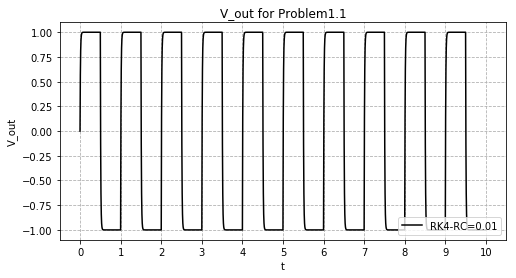

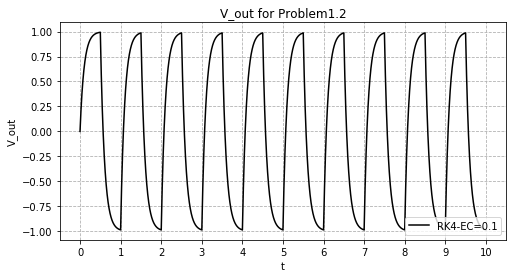

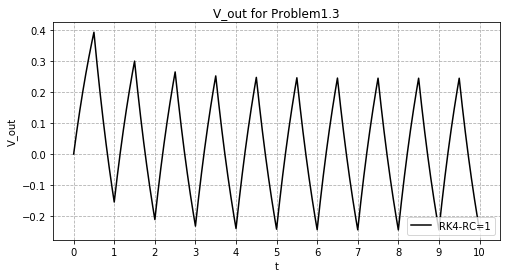

In [79]:
pro11=Problem1RC001();pro11.g(0,0);pro11.traj();pro11.results();pro11.plot()
pro12=Problem1RC01();pro12.g(0,0);pro12.traj();pro12.results();pro12.plot()
pro11=Problem1RC1();pro11.g(0,0);pro11.traj();pro11.results();pro11.plot()

The result shows how the circuit responds to the input square wave when connected with different RC combinations. As shown from the figures, when RC is small enough, the circuit can oscillate with the input signal with no delay and distortion. However, when RC grows larger from 0.01 to 0.1, the delay appears that the circuit needs some time to follow the input and reach its maximum together with some distortions. Finally, when RC switches to 1, the output signal can no longer reaches input maximum due to the longer delay time compared to half the period of the input signal, the stable output becomes a sawtooth wave.

**PROBLEM2**

Solving the first equation: 
    $$\frac{N_A}{dt}=-\frac{N_A}{\tau_A}$$
and we can simply get the result that 
    $$N_A(t)=N_0e^{-t/\tau_A}$$
As for the second eqaution, we first differentiate both sides about t: $\frac{d^2N_B}{dt^2}=\frac{dN_A}{\tau_Adt}-\frac{dN_B}{\tau_Bdt}$, and then replace parts that containing $N_A$ by using orginal relations so as to get a differential equation about $N_B$ only, which is 
    $$\frac{d^2N_B}{dt^2}+\frac{\tau_A+\tau_B}{\tau_A\tau_B}\frac{dN_B}{dt}+\frac{N_B}{\tau_A\tau_B}=0$$
By applying general solutions, we have 
    $$N_B(t)=C_1e^{-t/\tau_A}+C_2e^{-t/\tau_B}\;(if\; \tau_A\neq\tau_B)\\
    N_B(t)=(C_1+C_2t)e^{-t/\tau_A}\;(if\; \tau_A=\tau_B)$$
Plugging these two results into original equations, we can derive the relations of constants:
    $$for\; \tau_A\neq\tau_B:
    \frac{dN_B}{dt}=-\frac{C_1}{\tau_A}e^{-t/\tau_A}-\frac{C_2}{\tau_B}e^{-t/\tau_B}=\frac{N_0}{\tau_A}e^{-
    t/\tau_A}-\frac{C_1}{\tau_B}e^{-t/\tau_A}-\frac{C_2}{\tau_B}e^{-t/\tau_B}\\
    \frac{C_1}{\tau_B}=\frac{C_1+N_0}{\tau_A},\; C_1+C_2=0\;(for\; B\; comes\; from\; A)\\
    C_1=\frac{\tau_BN_0}{\tau_A-\tau_B},\;C2=-\frac{\tau_BN_0}{\tau_A-\tau_B}\\
    for\;\tau_A=\tau_B: 
    \frac{dN_B}{dt}=-\frac{C_1}{\tau_A}e^{-t/\tau_A}+C_2e^{-t/\tau_A}-\frac{C_2t}{\tau_A}e^{-t/\tau_A}=
    \frac{N_0}{\tau_A}e^{-t/\tau_A}-\frac{C_1}{\tau_A}e^{-t/\tau_A}-\frac{C_2t}{\tau_A}e^{-t/\tau_A}\\
    C_2=\frac{N_0}{\tau_A},\;C_1=0\;(due\;to\;N_B(0)=0)$$

**Conclusion**: This is the analytic solution for this problem:

$N_A$:
    $$N_A(t)=N_0e^{-t/\tau_A}$$
$N_B\;(\tau_A\neq\tau_B)$:
    $$N_B(t)=\frac{\tau_BN_0}{\tau_A-\tau_B}e^{-t/\tau_A}-\frac{\tau_BN_0}{\tau_A-\tau_B}e^{-t/\tau_B}$$
$N_B\;(\tau_A=\tau_B)$:
    $$N_B(t)=\frac{N_0}{\tau_A}te^{-t/\tau_A}$$

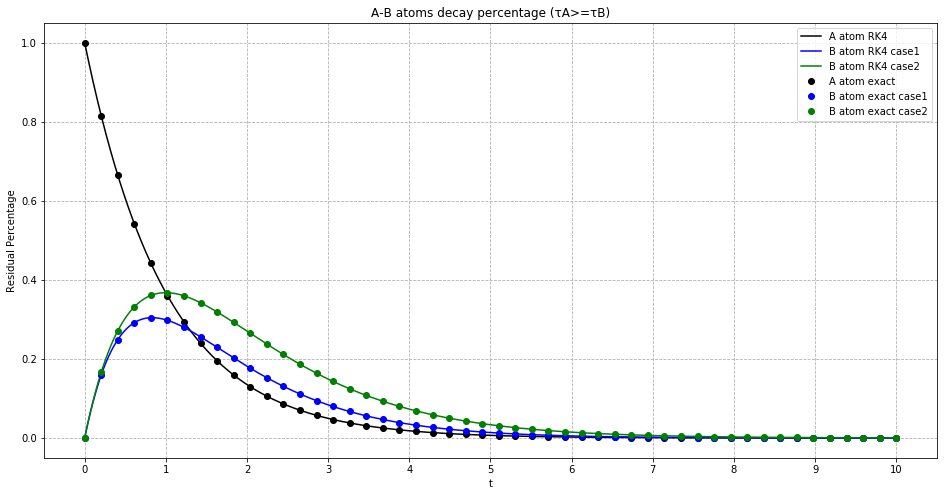

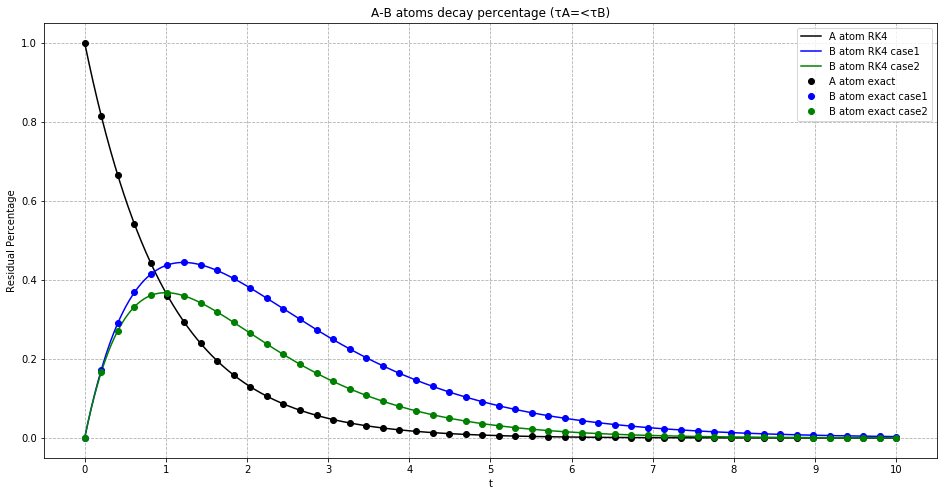

In [80]:
pro2=Problem2();pro2.g(1,0,0);pro2.f(1,0,0);pro2.h(1,0,0);pro2.traj();pro2.plot();
pro22=Problem22();pro22.g(1,0,0);pro22.f(1,0,0);pro22.h(1,0,0);pro22.traj();pro22.plot();

The results are shown above, where in the upper figure case 1 is the situation that $\tau_A=1\neq\tau_B=0.7$ and case 2 is the one that have $\tau_A=1=\tau_B$. The lower figure has case 1 for $\tau_A=1\neq\tau_B=1.5$ and the same case 2. As we can see that if $\tau_A=\tau_B$ the intersection point of $N_A$ and $N_B$ will have the x position exactly equals $\tau_A$. Larger (smaller) $\tau_A$, compared with the value of $\tau_B$, will cause corresponding case 1 $N_B$ curve lies below (above) the case 2 curve and it takes shorter (longer) period of time for its residual percentage dropping to 0.



**PROBLEM3**

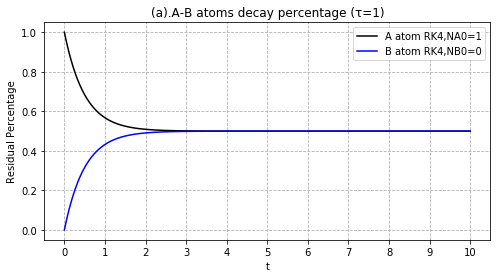

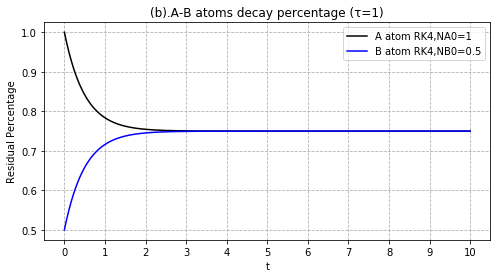

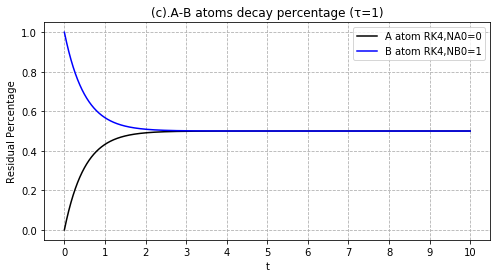

In [91]:
pro31=Problem31();pro31.g(1,0,0);pro31.f(1,0,0);pro31.traj();pro31.plot();
pro32=Problem32();pro32.g(1,0.5,0);pro32.f(1,0.5,0);pro32.traj();pro32.plot();
pro33=Problem33();pro33.g(0,1,0);pro33.f(0,1,0);pro33.traj();pro33.plot();

Figures above are problem3 with different initial situations: (a). $N_{A0}=1,N_{B0}=0$ (b). $N_{A0}=1,N_{B0}=0.5$ (c). $N_{A0}=0,N_{B0}=1$. All of them show that the system reaches a steady state that $N_A$ and $N_B$ are constant, which is half of $N_A+N_B$.

**PROBLEM4**

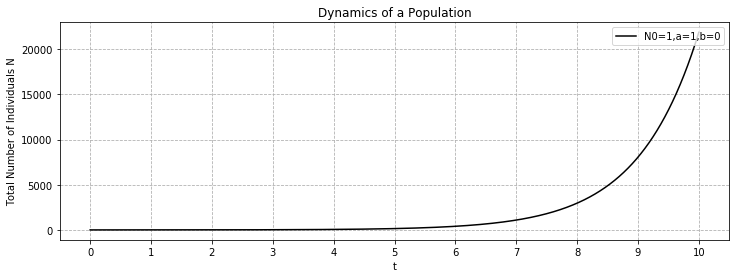

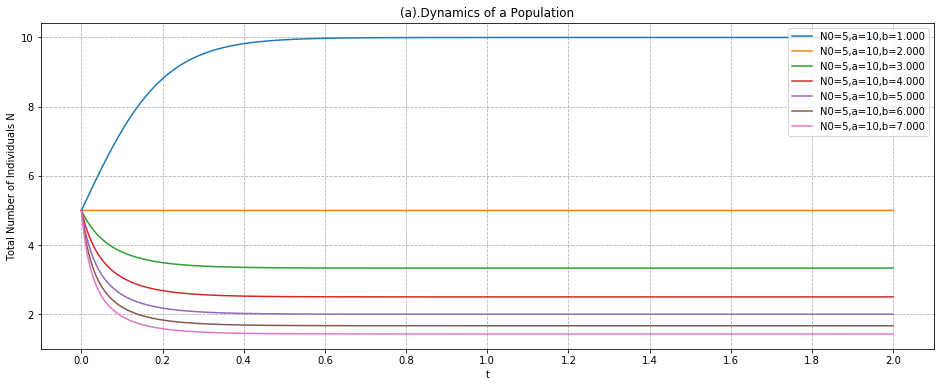

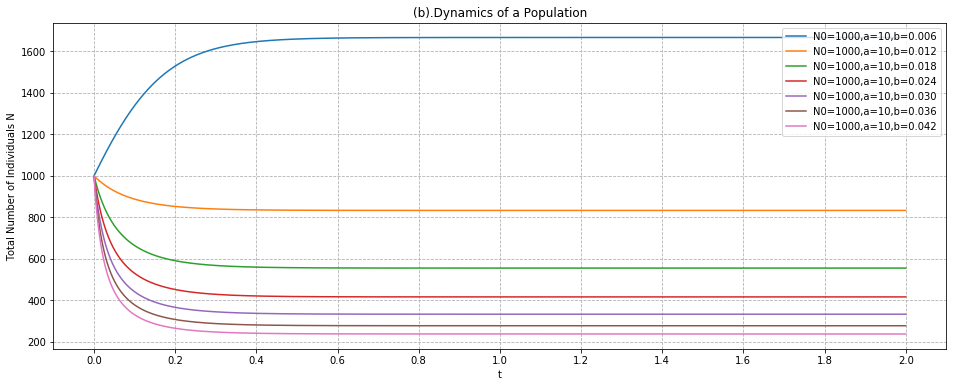

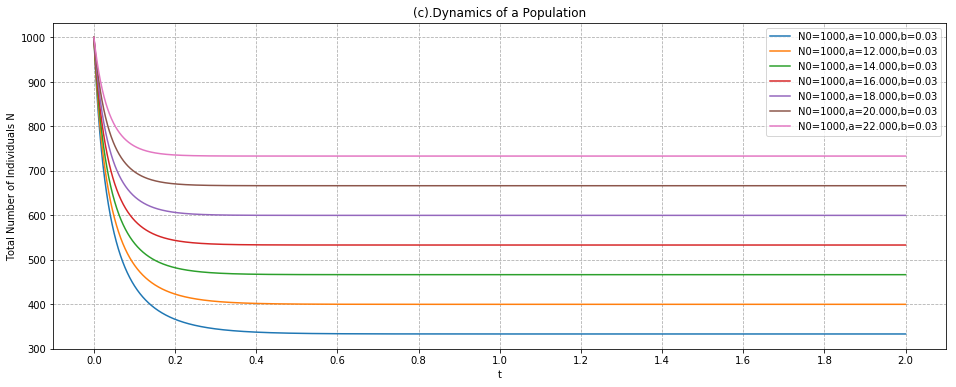

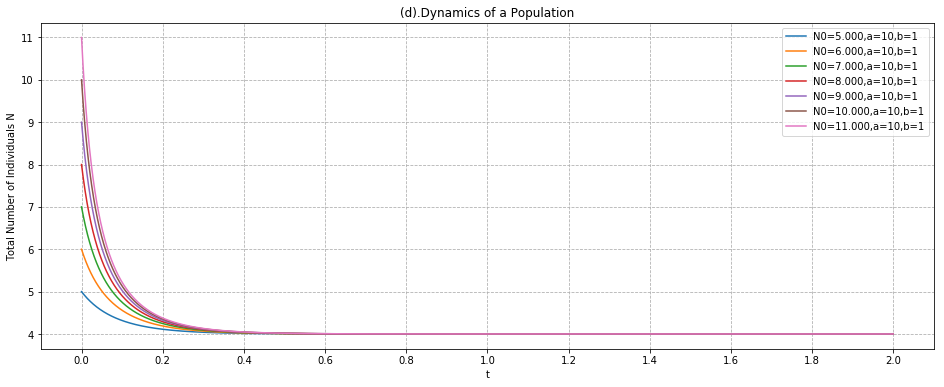

In [125]:
pro41=Problem41();pro41.g(1,0);pro41.traj();pro41.plot();
fig1=plt.figure(figsize = [16,6])
ax1=fig1.add_subplot(111)
for ii in range(7):
    x=np.array([]);t=np.array([]);
    pro42=Problem42();pro42.Const(10,ii+1,5);pro42.g(1,0);
    x,t =pro42.traj();
    ax1.plot(t, x, label = 'N0=5,a=10,b={0:0.3f}'.format(ii+1))
ax1.grid(ls='--')
ax1.set_xticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0])
ax1.set_title('(a).Dynamics of a Population')
ax1.set_xlabel('t')
ax1.set_ylabel("Total Number of Individuals N")
ax1.legend(loc=1)

fig2=plt.figure(figsize = [16,6])
ax2=fig2.add_subplot(111)
for ii in range(7):
    x=np.array([]);t=np.array([]);
    pro42=Problem42();pro42.Const(10,0.006*(1+ii),1000);pro42.g(1,0);
    x,t =pro42.traj();
    ax2.plot(t, x, label = 'N0=1000,a=10,b={0:0.3f}'.format((ii+1)*0.006))
ax2.grid(ls='--')
ax2.set_xticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0])
ax2.set_title('(b).Dynamics of a Population')
ax2.set_xlabel('t')
ax2.set_ylabel('Total Number of Individuals N')
ax2.legend(loc=1)

fig2=plt.figure(figsize = [16,6])
ax2=fig2.add_subplot(111)
for ii in range(7):
    x=np.array([]);t=np.array([]);
    pro42=Problem42();pro42.Const(10+2*ii,0.03,1000);pro42.g(1,0);
    x,t =pro42.traj();
    ax2.plot(t, x, label = 'N0=1000,a={0:0.3f},b=0.03'.format(10+2*ii))
ax2.grid(ls='--')
ax2.set_xticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0])
ax2.set_title('(c).Dynamics of a Population')
ax2.set_xlabel('t')
ax2.set_ylabel('Total Number of Individuals N')
ax2.legend(loc=1)

fig2=plt.figure(figsize = [16,6])
ax2=fig2.add_subplot(111)
for ii in range(7):
    x=np.array([]);t=np.array([]);
    pro42=Problem42();pro42.Const(10,2.5,5+1*ii);pro42.g(1,0);
    x,t =pro42.traj();
    ax2.plot(t, x, label = 'N0={0:0.3f},a=10,b=1'.format(5+1*ii))
ax2.grid(ls='--')
ax2.set_xticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0])
ax2.set_title('(d).Dynamics of a Population')
ax2.set_xlabel('t')
ax2.set_ylabel('Total Number of Individuals N')
ax2.legend(loc=1)


Results for different $N_0$ a and b are listed above. The effect of each factor can be interpreted as: (1). $N_0$ determines the start point of the figure; (2). Larger a will lift N upwards and leads to an earlier reach of equivalence; (3). Larger b will bend the N curve downwards and reduce it.